#**FAKE NEWS ANALYSIS**

---



#**Importing** **packages**

In [ ]:
#importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt   
import seaborn as sns




In [ ]:
from IPython.core.display import HTML
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from datetime import datetime
from sklearn.feature_extraction.text import CountVectorizer
from pandas import DataFrame
from collections import OrderedDict 


In [ ]:
#install kaggle
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"shubhangityagi","key":"886dae5912f542a08a2443d552e5c806"}'}

In [ ]:
#create a kaggle folder
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
#copy kaggle.json file to folder created
! cp kaggle.json ~/.kaggle/

In [ ]:
#permission for json to act
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:

#to list dataset in kaggle
! kaggle datasets list

ref                                                       title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
ruchi798/data-science-job-salaries                        Data Science Job Salaries                            7KB  2022-06-15 08:59:12           8016        267  1.0              
surajjha101/bigbasket-entire-product-list-28k-datapoints  BigBasket Entire Product List (~28K datapoints)      6MB  2022-06-22 12:51:18           2830        113  1.0              
victorsoeiro/netflix-tv-shows-and-movies                  Netflix TV Shows and Movies                          2MB  2022-05-15 00:01:23          17727        505  1.0              
sameepvani/nasa-nearest-earth-objects                     NASA - Nearest Earth Objects         

#**Downloading Dataset**

In [ ]:
! kaggle datasets download -d ruchi798/source-based-news-classification

  0% 0.00/2.97M [00:00<?, ?B/s]
100% 2.97M/2.97M [00:00<00:00, 155MB/s]


In [ ]:
! unzip /content/source-based-news-classification.zip

Archive:  /content/source-based-news-classification.zip
  inflating: news_articles.csv       


In [ ]:
data=pd.read_csv("/content/news_articles.csv")  #,encoding='latin-1'

In [ ]:
type(data)

pandas.core.frame.DataFrame

In [ ]:
data.isnull().any().any()

True

In [ ]:
data.isnull().any()

author                     False
published                  False
title                      False
text                        True
language                    True
site_url                    True
main_img_url                True
type                        True
label                       True
title_without_stopwords     True
text_without_stopwords      True
hasImage                    True
dtype: bool

In [ ]:
data=data.dropna()
print(data)

                    author                      published  \
0        Barracuda Brigade  2016-10-26T21:41:00.000+03:00   
1     reasoning with facts  2016-10-29T08:47:11.259+03:00   
2        Barracuda Brigade  2016-10-31T01:41:49.479+02:00   
3                   Fed Up  2016-11-01T05:22:00.000+02:00   
4                   Fed Up  2016-11-01T21:56:00.000+02:00   
...                    ...                            ...   
2041           Matt Barber  2016-10-27T03:04:50.327+03:00   
2042         Jane Chastain  2016-10-27T03:04:50.704+03:00   
2043         Michael Brown  2016-10-27T03:04:54.788+03:00   
2044           Ann Coulter  2016-10-27T03:05:01.989+03:00   
2045           Larry Elder  2016-10-27T03:05:05.815+03:00   

                                                  title  \
0     muslims busted they stole millions in govt ben...   
1     re why did attorney general loretta lynch plea...   
2     breaking weiner cooperating with fbi on hillar...   
3     pin drop speech by father

In [ ]:
data.head(50)


,author,published,title,text,language,site_url,main_img_url,type,label,title_without_stopwords,text_without_stopwords,hasImage
0,Barracuda Brigade,2016-10-26T21:41:00.000+03:00,muslims busted they stole millions in govt ben...,print they should pay all the back all the mon...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,muslims busted stole millions govt benefits,print pay back money plus interest entire fami...,1.0
1,reasoning with facts,2016-10-29T08:47:11.259+03:00,re why did attorney general loretta lynch plea...,why did attorney general loretta lynch plead t...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,attorney general loretta lynch plead fifth,attorney general loretta lynch plead fifth bar...,1.0
2,Barracuda Brigade,2016-10-31T01:41:49.479+02:00,breaking weiner cooperating with fbi on hillar...,red state \nfox news sunday reported this mor...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,breaking weiner cooperating fbi hillary email ...,red state fox news sunday reported morning ant...,1.0
3,Fed Up,2016-11-01T05:22:00.000+02:00,pin drop speech by father of daughter kidnappe...,email kayla mueller was a prisoner and torture...,english,100percentfedup.com,http://100percentfedup.com/wp-content/uploads/...,bias,Real,pin drop speech father daughter kidnapped kill...,email kayla mueller prisoner tortured isis cha...,1.0
4,Fed Up,2016-11-01T21:56:00.000+02:00,fantastic trumps point plan to reform healthc...,email healthcare reform to make america great ...,english,100percentfedup.com,http://100percentfedup.com/wp-content/uploads/...,bias,Real,fantastic trumps point plan reform healthcare ...,email healthcare reform make america great sin...,1.0
5,Barracuda Brigade,2016-11-02T16:31:28.550+02:00,hillary goes absolutely berserk on protester a...,print hillary goes absolutely berserk she expl...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/11/Fu...,bias,Real,hillary goes absolutely berserk protester rall...,print hillary goes absolutely berserk explodes...,1.0
6,Fed Up,2016-11-04T19:40:00.000+02:00,breaking nypd ready to make arrests in weiner ...,breaking nypd ready to make arrests in weiner ...,english,100percentfedup.com,http://100percentfedup.com/wp-content/uploads/...,bias,Real,breaking nypd ready make arrests weiner casehi...,breaking nypd ready make arrests weiner casehi...,1.0
7,Fed Up,2016-11-05T01:19:00.000+02:00,wow whistleblower tells chilling story of mass...,breaking nypd ready to make arrests in weiner ...,english,100percentfedup.com,http://100percentfedup.com/wp-content/uploads/...,bias,Real,wow whistleblower tells chilling story massive...,breaking nypd ready make arrests weiner casehi...,1.0
8,Fed Up,2016-11-06T23:54:00.000+02:00,breaking clinton clearedwas this a coordinated...,limbaugh said that the revelations in the wiki...,english,100percentfedup.com,http://100percentfedup.com/wp-content/uploads/...,bias,Real,breaking clinton clearedwas coordinated last m...,limbaugh said revelations wikileaks material s...,1.0
9,Fed Up,2016-11-07T02:43:00.000+02:00,evil hillary supporters yell fck trumpburn tru...,email \nthese people are sick and evil they wi...,english,100percentfedup.com,http://100percentfedup.com/wp-content/uploads/...,bias,Real,evil hillary supporters yell fck trumpburn tru...,email people sick evil stop nothing get way la...,1.0


In [ ]:
data.shape

(2045, 12)

In [ ]:
data.columns   

Index(['author', 'published', 'title', 'text', 'language', 'site_url',
       'main_img_url', 'type', 'label', 'title_without_stopwords',
       'text_without_stopwords', 'hasImage'],
      dtype='object')

#**Exploratory Data Analysis (EDA)**

##Pie-chart representing Real vs Fake news - 




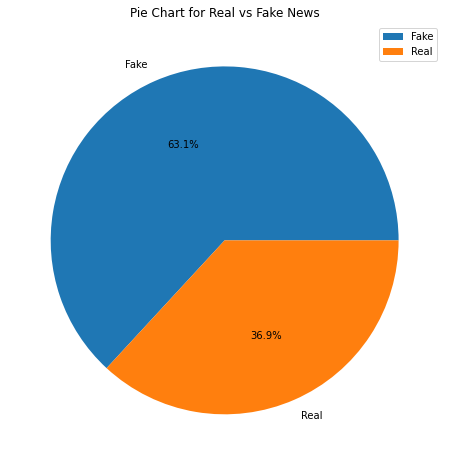

In [ ]:
#counts the number/%age of real and fake news
import math
different_labels = data['label'].unique()
counts = data['label'].value_counts().values
#plotting pie chart for real vs fake
plt.figure(figsize=(8,8))
plt.pie(counts, labels=['Fake', 'Real'],autopct='%1.1f%%') #autopct to display percent value using py string formatting
plt.title("Pie Chart for Real vs Fake News")
plt.legend()

##Pie-Chart representing Types of articles.

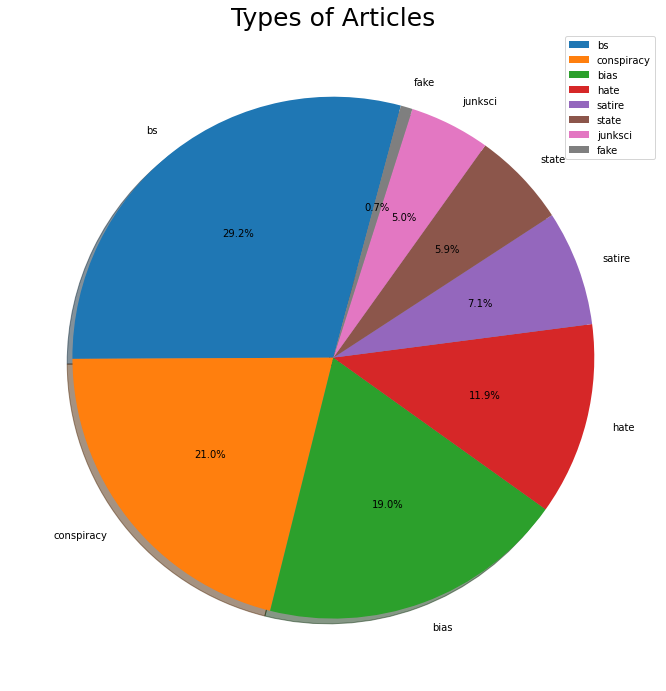

In [ ]:
data['type'].value_counts().plot.pie(figsize = (15,12), startangle = 75,autopct = "%.1f%%",shadow=True)
plt.title('Types of Articles', fontsize = 25)
plt.axis('off')
plt.legend()
plt.show()

##Real and Fake strip plot

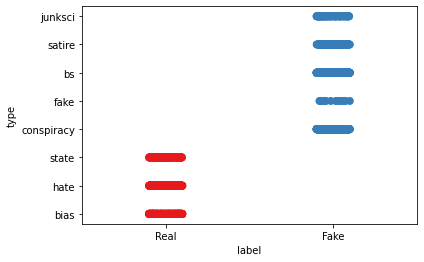

In [ ]:
sns.stripplot(x="label", y="type", data=data,size=8,palette="Set1")

##Bar graph representing Count vs Language

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


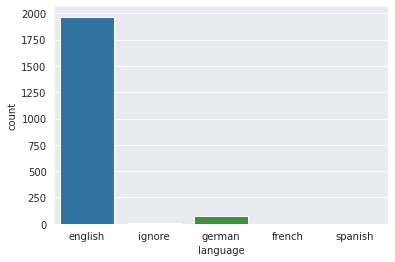

In [ ]:
sns.set_style("darkgrid")
sns.countplot(data['language'])

##Word Cloud representing the most occuring words in the given dataset.

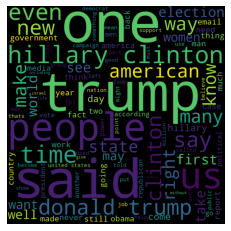

In [ ]:
from wordcloud import WordCloud 
wc = WordCloud(background_color="black", max_words=100,
               max_font_size=256,
               random_state=42, width=1000, height=1000)
wc.generate(' '.join(data['text_without_stopwords']))
plt.imshow(wc)
plt.axis('off')
plt.show()

##Bar Graph representing number of articles written vs author.

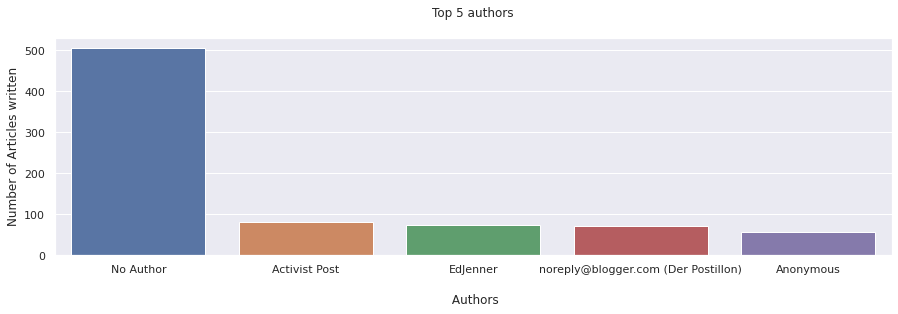

In [ ]:
#top 5 authors
d = data['author'].value_counts().sort_values(ascending=False).head(5)
d = pd.DataFrame(d)
d = d.reset_index() # dataframe with top 5 authors

# Plotting
sns.set()
plt.figure(figsize=(15,4))
sns.barplot(x='index', y='author', data=d)
plt.xlabel("\n Authors")
plt.ylabel("Number of Articles written")
plt.title("Top 5 authors\n")
plt.show()

##Bar graph representing the top 10 fake news sites by taking the site URL into consideration.

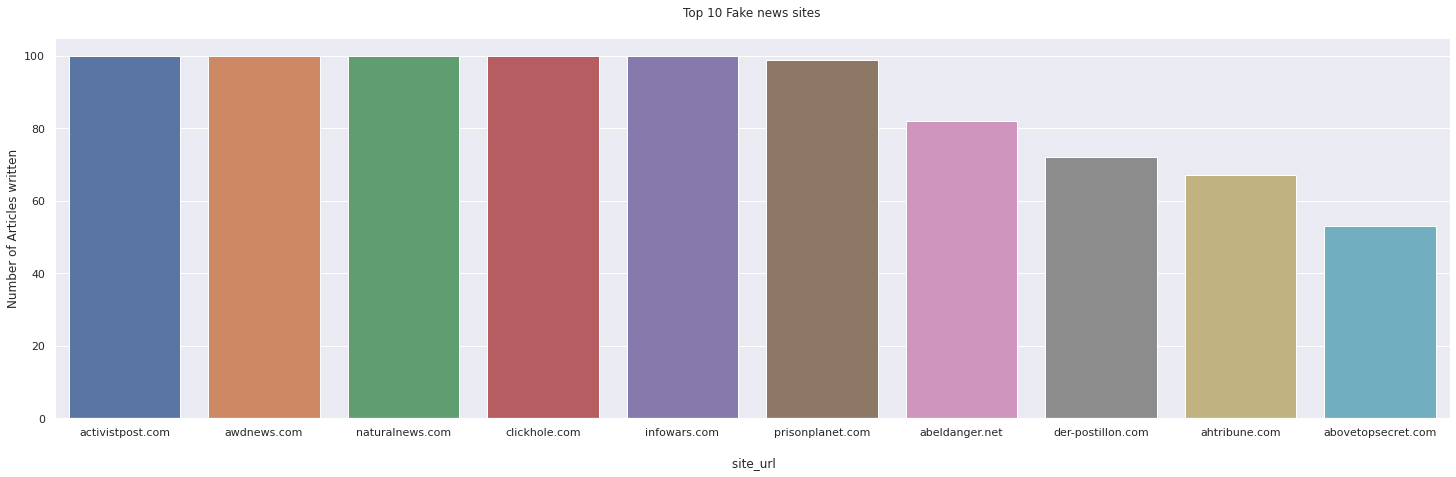

In [ ]:
#top 10 fake news sites
d = data[data['label'] == 'Fake']['site_url'].value_counts().sort_values(ascending=False).head(10)
d = pd.DataFrame(d)
d = d.reset_index() # dataframe with top 10 fake news site

# Plotting
sns.set()
plt.figure(figsize=(25,7))
sns.barplot(x='index', y='site_url', data=d)
plt.xlabel("\n site_url")
plt.ylabel("Number of Articles written")
plt.title("Top 10 Fake news sites\n")
plt.show()

##Bar graph representing the top 10 trustworthy news sites by taking the site URL into consideration.

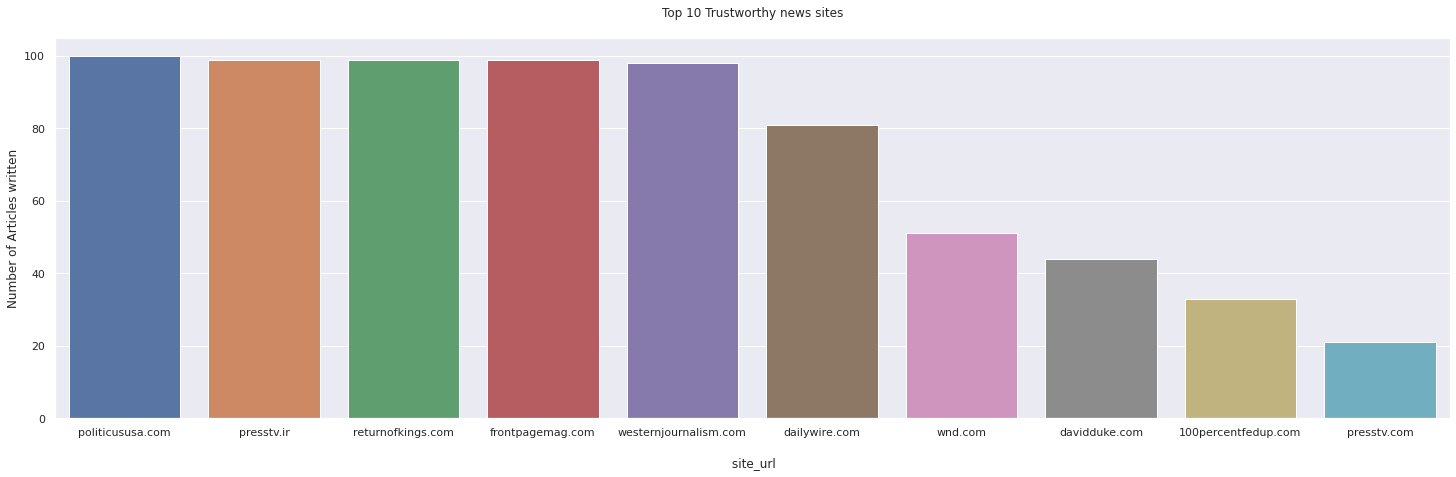

In [ ]:
d = data[data['label'] == 'Real']['site_url'].value_counts().sort_values(ascending=False).head(10)
d = pd.DataFrame(d)
d = d.reset_index() # dataframe with top 10 Trustworthy news site

# Plotting
sns.set()
plt.figure(figsize=(25,7))
sns.barplot(x='index', y='site_url', data=d)
plt.xlabel("\n site_url")
plt.ylabel("Number of Articles written")
plt.title("Top 10 Trustworthy news sites\n")
plt.show()

##**Modelling**

The three models that we picked for real vs fake news analysis are:


1. Random Forest
2. Decision Tree
3. Support Vector Machine (SVM)

The predictions corresponding to these models are as follows:






##Importing libraries for Modelling.

In [ ]:
from IPython.core.display import HTML
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

from datetime import datetime
from sklearn.feature_extraction.text import CountVectorizer
from pandas import DataFrame
from collections import OrderedDict 

In [ ]:
features = data[['site_url', 'text_without_stopwords']]
features.head(5)

,site_url,text_without_stopwords
0,100percentfedup.com,print pay back money plus interest entire fami...
1,100percentfedup.com,attorney general loretta lynch plead fifth bar...
2,100percentfedup.com,red state fox news sunday reported morning ant...
3,100percentfedup.com,email kayla mueller prisoner tortured isis cha...
4,100percentfedup.com,email healthcare reform make america great sin...


In [ ]:
features['url_text'] = features["site_url"].astype(str) + " " + features["text_without_stopwords"]
features.drop(['site_url', 'text_without_stopwords'], axis = 1, inplace = True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
x = features
y = data['label']

In [ ]:
y = y.tolist()

##Splitting the Data into Train and Test subsets.

###Training :- The dataset upon which the model would be trained on.

###Testing :- The dataset upon which the model would be tested against

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20)

tfidf_vect = TfidfVectorizer(stop_words = 'english')
tfidf_train = tfidf_vect.fit_transform(x_train['url_text'])
tfidf_test = tfidf_vect.transform(x_test['url_text'])
tfidf_df = pd.DataFrame(tfidf_train.A, columns=tfidf_vect.get_feature_names())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# **Model 1 : Random Forest**
Random forest is a Supervised Machine Learning Algorithm that is used widely in Classification and Regression problems. It builds decision trees on different samples and takes their majority vote for classification and average in case of regression.

In [ ]:
Random = RandomForestClassifier(n_estimators=150,random_state=0)
Random.fit(tfidf_train,y_train)
y_pred = Random.predict(tfidf_test)

## The Confusion Matrix corresponding to the Random Forest Model.

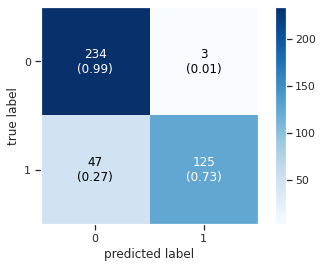

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from mlxtend.plotting import plot_confusion_matrix

cm=confusion_matrix(y_test, y_pred)

fig, ax = plot_confusion_matrix(conf_mat=cm,
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)

We can get the numbers of `True Positives, True Negatives, False Positives and False Negatives` from the above confusion matrix.   


In [ ]:
# from the confusion matrix
TP = true_pos = 115
TN = true_neg = 253
FP = false_pos = 9
FN = false_neg = 32

In [ ]:
results = {}

#### Accuracy 
Accuracy is defined as the number of examples correctly predicted to the total number of examples. 
![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/c72ec21ef2505c2d376e96197637fc64f75e5891)

In [ ]:
metric = "ACC"
results[metric] = (TP + TN) / (TP + TN + FP + FN)
print(f"{metric} is {results[metric]: .3f}")

ACC is  0.900


#### True Positive Rate
number of samples actually positive and predicted as  `Positive` / total number of samples actually `Positive`  
Also called **Sensitivity or Recall**.  
![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/64d5540cbadeb83f864d7a731b7ab43cccd0f353)

In [ ]:
# Sensitivity or Recall
metric = "TPR"
results[metric] = TP / (TP + FN)
print(f"{metric} is {results[metric]: .3f}")

TPR is  0.782


#### True Negative Rate
number of samples actually negative and predicted as  `Negative` / total number of samples actually  `Negative`  
Also called **Specificity**.  
![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/aac65b6586cb61c1268403895012c2a8f19b0c5e)

In [ ]:
# Specificity
metric = "TNR"
results[metric] = TN / (TN + FP)
print(f"{metric} is {results[metric]: .3f}")

TNR is  0.966


In [ ]:
# Precision
metric = "PPV"
results[metric] = TP / (TP + FP)
print(f"{metric} is {results[metric]: .3f}")

PPV is  0.927


In [ ]:
metric = "NPV"
results[metric] = TN / (TN + FN)
print(f"{metric} is {results[metric]: .3f}")

NPV is  0.888


## Calculating the F1 score corresponding to the Random Forest Model.
Harmonic Mean of Precision and Recall.  
![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/5663ca95d471868169c4e4ea57c936f1b6f4a588)

In [ ]:
metric = "F1"
results[metric] = 2 / (1 / results["PPV"] + 1 / results["TPR"])
print(f"{metric} is {results[metric]: .3f}")

F1 is  0.849


The Accuracy and F1 Score corresponding to the Random Forest Model :-


1. Accuracy(ACC) = 0.900
2. F1 Score(F1) = 0.772




#**Model 2 : Decision Tree**
Decision trees are a type of Supervised Machine Learning models where the data is continuously split according to a certain parameter.

In [ ]:
Adab = AdaBoostClassifier(DecisionTreeClassifier(max_depth=10),n_estimators=5,random_state=0)
Adab.fit(tfidf_train, y_train)
y_pred = Adab.predict(tfidf_test)


## The Confusion Matrix corresponding to the Decision Tree Model.

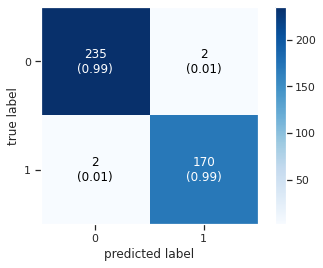

In [ ]:
cm=confusion_matrix(y_test, y_pred)

fig, ax = plot_confusion_matrix(conf_mat=cm,
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)

Calculating True Positives, True Negatives, False Positives and False Negatives.

In [ ]:
TP = true_pos = 146
TN = true_neg = 258
FP = false_pos = 4
FN = false_neg = 1

In [ ]:
results = {}

## Accuracy

In [ ]:
metric = "ACC"
results[metric] = (TP + TN) / (TP + TN + FP + FN)
print(f"{metric} is {results[metric]: .3f}")

ACC is  0.988


In [ ]:
metric = "TPR"
results[metric] = TP / (TP + FN)
print(f"{metric} is {results[metric]: .3f}")

TPR is  0.993


In [ ]:
metric = "PPV"
results[metric] = TP / (TP + FP)
print(f"{metric} is {results[metric]: .3f}")

PPV is  0.973


## Calculating the F1 Scrore corresponding to the Decision Tree model.

In [ ]:
metric = "F1"
results[metric] = 2 / (1 / results["PPV"] + 1 / results["TPR"])
print(f"{metric} is {results[metric]: .3f}")

F1 is  0.983


The Accuracy and F1 Score corresponding to the Decision Tree Model :-



1. Accuracy(ACC) = 0.988
2. F1 Score(F1) = 0.983




#Predicting accuracy of few examples using Decision Tree Model:

In [ ]:
import pandas as pd 
data=pd.read_csv('/content/news_articles.csv')
author_dict = data["author"].value_counts()
print(author_dict )

author_dict_new = {
    'Barracuda Brigade': 2,
    'Fed Up': 2,
    'reasoning with facts': 1,
    
}

print(author_dict_new)

No Author                              505
Activist Post                           82
EdJenner                                73
noreply@blogger.com (Der Postillon)     72
Anonymous                               58
                                      ... 
Frontpagemag.com                         1
Phyllis Chesler                          1
Emma-Kate Symons                         1
Ilana Mercer                             1
Eddy Lavine                              1
Name: author, Length: 491, dtype: int64
{'Barracuda Brigade': 2, 'Fed Up': 2, 'reasoning with facts': 1}


In [ ]:
def author(x):
    if str(x) in author_dict_new.keys():
        return author_dict_new[str(x)]
    else:
        return author_dict_new['reasoning with facts']
    
data_l = data["author"].apply(author)
data['author'] = data_l
data.head()

,author,published,title,text,language,site_url,main_img_url,type,label,title_without_stopwords,text_without_stopwords,hasImage
0,2,2016-10-26T21:41:00.000+03:00,muslims busted they stole millions in govt ben...,print they should pay all the back all the mon...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,muslims busted stole millions govt benefits,print pay back money plus interest entire fami...,1.0
1,1,2016-10-29T08:47:11.259+03:00,re why did attorney general loretta lynch plea...,why did attorney general loretta lynch plead t...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,attorney general loretta lynch plead fifth,attorney general loretta lynch plead fifth bar...,1.0
2,2,2016-10-31T01:41:49.479+02:00,breaking weiner cooperating with fbi on hillar...,red state \nfox news sunday reported this mor...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,breaking weiner cooperating fbi hillary email ...,red state fox news sunday reported morning ant...,1.0
3,2,2016-11-01T05:22:00.000+02:00,pin drop speech by father of daughter kidnappe...,email kayla mueller was a prisoner and torture...,english,100percentfedup.com,http://100percentfedup.com/wp-content/uploads/...,bias,Real,pin drop speech father daughter kidnapped kill...,email kayla mueller prisoner tortured isis cha...,1.0
4,2,2016-11-01T21:56:00.000+02:00,fantastic trumps point plan to reform healthc...,email healthcare reform to make america great ...,english,100percentfedup.com,http://100percentfedup.com/wp-content/uploads/...,bias,Real,fantastic trumps point plan reform healthcare ...,email healthcare reform make america great sin...,1.0


In [ ]:
label= pd.get_dummies(data["label"])
label.head()

,Fake,Real
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


# **Model 3 : Support Vector Machine (SVM)**
A support vector machine (SVM) is machine learning algorithm that analyzes data for classification and regression analysis. SVM is a supervised learning method that looks at data and sorts it into one of two categories.

In [ ]:
from sklearn import svm

clf = svm.SVC(kernel='linear')
clf.fit(tfidf_train,y_train)
y_pred = clf.predict(tfidf_test)

## The Confusion Matrix corresponding to the Support Vector Machine Model.

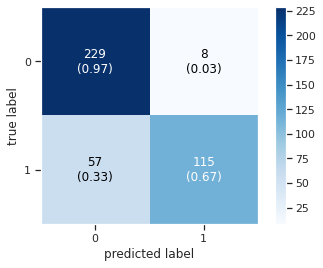

In [ ]:
cm=confusion_matrix(y_test, y_pred)

fig, ax = plot_confusion_matrix(conf_mat=cm,
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)

Calculating True Positives, True Negatives, False Positives and False Negatives.

In [ ]:
TP = true_pos = 103
TN = true_neg = 245
FP = false_pos = 17
FN = false_neg = 44

In [ ]:
results = {}

## Accuracy

In [ ]:
metric = "ACC"
results[metric] = (TP + TN) / (TP + TN + FP + FN)
print(f"{metric} is {results[metric]: .3f}")

ACC is  0.851


In [ ]:
metric = "TPR"
results[metric] = TP / (TP + FN)
print(f"{metric} is {results[metric]: .3f}")

TPR is  0.701


In [ ]:
metric = "PPV"
results[metric] = TP / (TP + FP)
print(f"{metric} is {results[metric]: .3f}")

PPV is  0.858


## Calculating the F1 Scrore corresponding to the Support Vector Machine Model.

In [ ]:
metric = "F1"
results[metric] = 2 / (1 / results["PPV"] + 1 / results["TPR"])
print(f"{metric} is {results[metric]: .3f}")

F1 is  0.772


The Accuracy and F1 Score corresponding to the Support Vector machine Model :-

1. Accuracy(ACC) = 0.851
2. F1 Score(F1) = 0.772






# **The best out of these three models is the Decision Tree Model.**
# **We chose the Decision Tree over other models because:**

## 1. Decision Tree model gave the most Accurate results with an accuracy of 98.8%.
## 2. Decision trees are one of the best forms of learning algorithms based on various learning methods.
## 3. They boost predictive models with accuracy, ease in interpretation, and stability.
## 4. The tools are also effective in fitting non-linear relationships since they can solve data-fitting challenges, such as regression and classifications and our Dataset was a Non-Linear one.
## 5. Decision Trees are easy to read and interpret, easy to prepare and requires less data cleaning.



